# 电商用户行为分析一 描述性统计

## 1.数据读取与预处理

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#图像在notebook中显示
%matplotlib inline 

In [7]:
file_path = 'UserBehavior.csv'
column_names = ['user_id','item_id','category_id','behavior_type','timestamp']
df = pd.read_csv(file_path,header = None,names = column_names)
print(df.head(100)) #显示前100行

    user_id  item_id  category_id behavior_type   timestamp
0         1  2268318      2520377            pv  1511544070
1         1  2333346      2520771            pv  1511561733
2         1  2576651       149192            pv  1511572885
3         1  3830808      4181361            pv  1511593493
4         1  4365585      2520377            pv  1511596146
..      ...      ...          ...           ...         ...
95      100  1819306      1194311            pv  1511745401
96      100  4182583      1258177            pv  1511750991
97      100  2337874      1194311            pv  1511751022
98      100  3658601      2342116            pv  1511757958
99      100  5153036      2342116            pv  1511758581

[100 rows x 5 columns]


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100150807 entries, 0 to 100150806
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   category_id    int64 
 3   behavior_type  object
 4   timestamp      int64 
dtypes: int64(4), object(1)
memory usage: 3.7+ GB
None


In [9]:
# 转换时间戳为 datetime 类型
df['event_time'] = pd.to_datetime(df['timestamp'], unit='s')
# 删除原始 timestamp 
df.drop(columns=['timestamp'], inplace=True)
# 按时间排序
df.sort_values(['user_id', 'event_time'], inplace=True)
print(df.info())
print("\n前几行数据预览：")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100150807 entries, 0 to 397581
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   category_id    int64         
 3   behavior_type  object        
 4   event_time     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.5+ GB
None

前几行数据预览：
   user_id  item_id  category_id behavior_type          event_time
0        1  2268318      2520377            pv 2017-11-24 17:21:10
1        1  2333346      2520771            pv 2017-11-24 22:15:33
2        1  2576651       149192            pv 2017-11-25 01:21:25
3        1  3830808      4181361            pv 2017-11-25 07:04:53
4        1  4365585      2520377            pv 2017-11-25 07:49:06


In [10]:
# 数据按时间过滤 保留2017年11月25日至2017年12月3日之间
start_date = pd.to_datetime('2017-11-25')
end_date = pd.to_datetime('2017-12-03 23:59:59') 
# 过滤数据
df = df[(df['event_time'] >= start_date) & (df['event_time'] <= end_date)]

In [11]:
# 检查结果
print("过滤后数据的时间范围：", df['event_time'].min(), " - ", df['event_time'].max())
print("保留的数据条数：", len(df))

过滤后数据的时间范围： 2017-11-25 00:00:00  -  2017-12-03 23:52:41
保留的数据条数： 98914533


## 2.描述性统计分析

### 1.数据规模 字段基本信息

In [12]:
# 行数和列数
print("数据维度:", df.shape)

数据维度: (98914533, 5)


In [13]:
# 字段类型和缺失值概览
print("\n字段信息：")
print(df.info())


字段信息：
<class 'pandas.core.frame.DataFrame'>
Int64Index: 98914533 entries, 2 to 397581
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   category_id    int64         
 3   behavior_type  object        
 4   event_time     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.4+ GB
None


In [14]:
# 简要数值统计（仅对数值字段）
print("\n数值字段描述性统计：")
print(df.describe()) ###没啥用


数值字段描述性统计：
            user_id       item_id   category_id
count  9.891453e+07  9.891453e+07  9.891453e+07
mean   5.068664e+05  2.579752e+06  2.696631e+06
std    2.940692e+05  1.488050e+06  1.463178e+06
min    1.000000e+00  1.000000e+00  8.000000e+01
25%    2.523550e+05  1.295244e+06  1.320293e+06
50%    5.038920e+05  2.580632e+06  2.671397e+06
75%    7.608560e+05  3.862029e+06  4.145813e+06
max    1.018011e+06  5.163070e+06  5.162429e+06


### 2. 行为类型分布统计

In [15]:
# 行为类型数量统计
behavior_counts = df['behavior_type'].value_counts()
print("\n各行为类型数量统计：")
print(behavior_counts)


各行为类型数量统计：
pv      88596903
cart     5466118
fav      2852536
buy      1998976
Name: behavior_type, dtype: int64


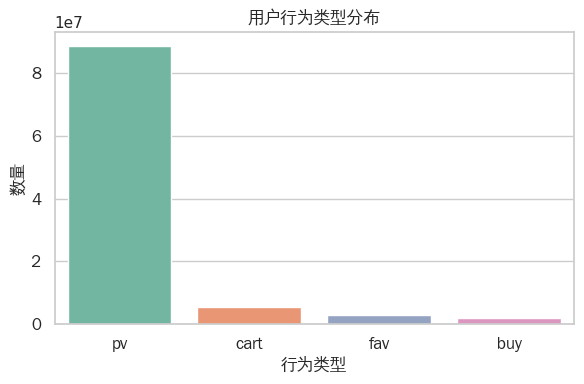

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# 指定字体路径
font_path = '/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc'
myfont = FontProperties(fname=font_path)

plt.figure(figsize=(6, 4))
sns.barplot(x=behavior_counts.index, y=behavior_counts.values, palette='Set2')

# 设置字体应用到中文元素
plt.title("用户行为类型分布", fontproperties=myfont)
plt.xlabel("行为类型", fontproperties=myfont)
plt.ylabel("数量", fontproperties=myfont)

# 也可设置刻度字体
plt.xticks(fontproperties=myfont)
plt.yticks(fontproperties=myfont)

plt.tight_layout()
plt.savefig('figures/用户行为类型分布.png')
plt.show()


### 3.用户/商品 数量统计

In [23]:
print("唯一用户数：", df['user_id'].nunique())
print("唯一商品数：", df['item_id'].nunique())
print("唯一品类数：", df['category_id'].nunique())


唯一用户数： 987984
唯一商品数： 4142583
唯一品类数： 9435


### 4.每天行为数量统计

In [30]:
# 转为日期类型（去除时间）
df['date'] = df['event_time'].values.astype('datetime64[D]')

# 添加星期几（英文）
df['weekday_num'] = df['event_time'].dt.dayofweek
df['weekday'] = df['weekday_num'].map({
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
})

# 每天行为数量
daily_behavior = df.groupby('date').size()
print(daily_behavior)
# 创建标签
dates = pd.to_datetime(daily_behavior.index)
date_labels = [f"{d.strftime('%m-%d')} ({d.strftime('%a')})" for d in dates]


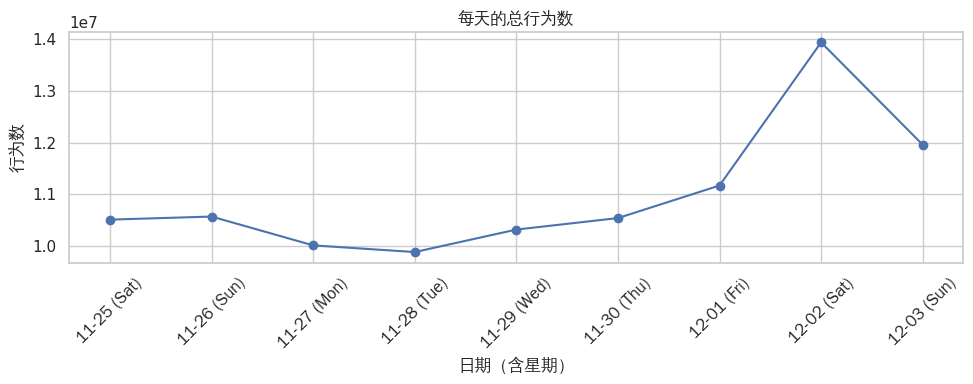

In [115]:
plt.figure(figsize=(10, 4))
plt.plot(date_labels, daily_behavior.values, marker='o')
plt.title("每天的总行为数", fontproperties=myfont)
plt.ylabel("行为数", fontproperties=myfont)
plt.xlabel("日期（含星期）", fontproperties=myfont)
plt.xticks(rotation=45, fontproperties=myfont)
plt.tight_layout()
plt.savefig('figures/每天的总行为数.png')
plt.show()

### 5.每天分类数量统计

In [32]:
# 按日期和行为类型统计数量
daily_behavior_by_type = df.groupby(['date', 'behavior_type']).size().unstack(fill_value=0)


behavior_type     buy    cart     fav        pv
date                                           
2017-11-25     201298  569236  305814   9435257
2017-11-26     214314  575420  305722   9475590
2017-11-27     218402  539212  289413   8966430
2017-11-28     211757  533807  289431   8849194
2017-11-29     223082  554747  299588   9241649
2017-11-30     222238  573032  304428   9442000
2017-12-01     212855  642251  314121  10002288
2017-12-02     259555  801367  404821  12475206
2017-12-03     235475  677046  339198  10709289


In [ ]:
# 固定行为顺序
behavior_order = ['pv', 'cart', 'fav', 'buy']
daily_behavior_by_type = daily_behavior_by_type[behavior_order]

print(daily_behavior_by_type)

behavior_type        pv    cart     fav     buy
date                                           
2017-11-25      9435257  569236  305814  201298
2017-11-26      9475590  575420  305722  214314
2017-11-27      8966430  539212  289413  218402
2017-11-28      8849194  533807  289431  211757
2017-11-29      9241649  554747  299588  223082
2017-11-30      9442000  573032  304428  222238
2017-12-01     10002288  642251  314121  212855
2017-12-02     12475206  801367  404821  259555
2017-12-03     10709289  677046  339198  235475


In [34]:
# 转成datetime方便格式化标签
dates_dt = pd.to_datetime(daily_behavior_by_type.index)
# 生成带英文星期的标签
date_labels = [f"{d.strftime('%m-%d')} ({d.strftime('%a')})" for d in dates_dt]


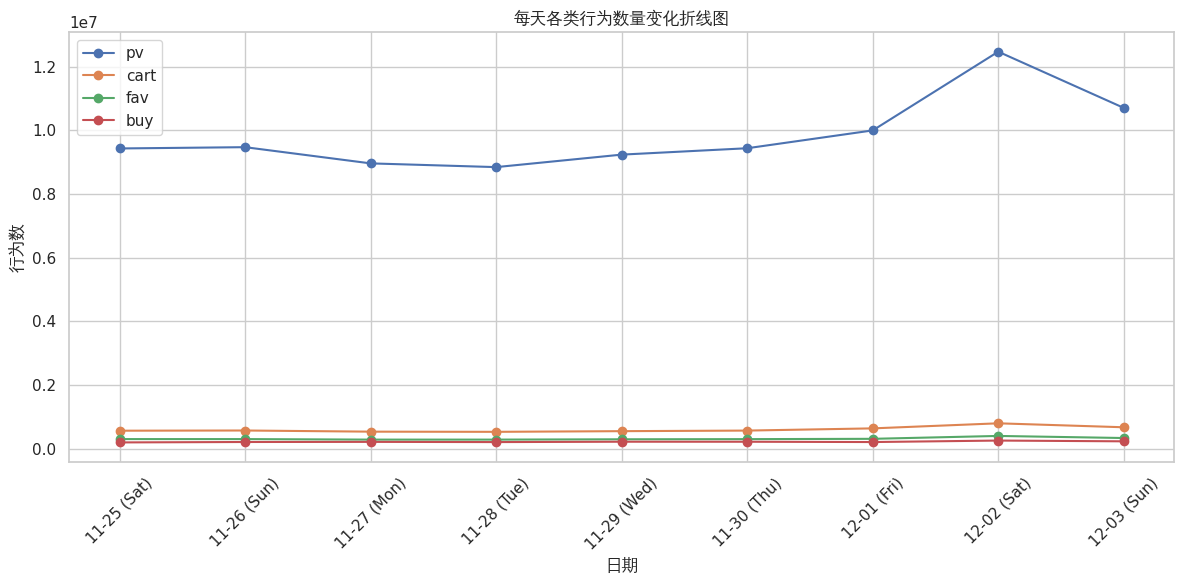

In [97]:
plt.figure(figsize=(12, 6))
for behavior in daily_behavior_by_type.columns:
    plt.plot(daily_behavior_by_type.index, daily_behavior_by_type[behavior], marker='o', label=behavior)

plt.title("每天各类行为数量变化折线图",fontproperties=myfont) 
plt.xlabel("日期",fontproperties=myfont)  
plt.ylabel("行为数",fontproperties=myfont)  

plt.xticks(ticks=daily_behavior_by_type.index, labels=date_labels, rotation=45)

plt.legend()
plt.tight_layout()
plt.savefig('figures/每天各类行为数量变化折线图.png')
plt.show()

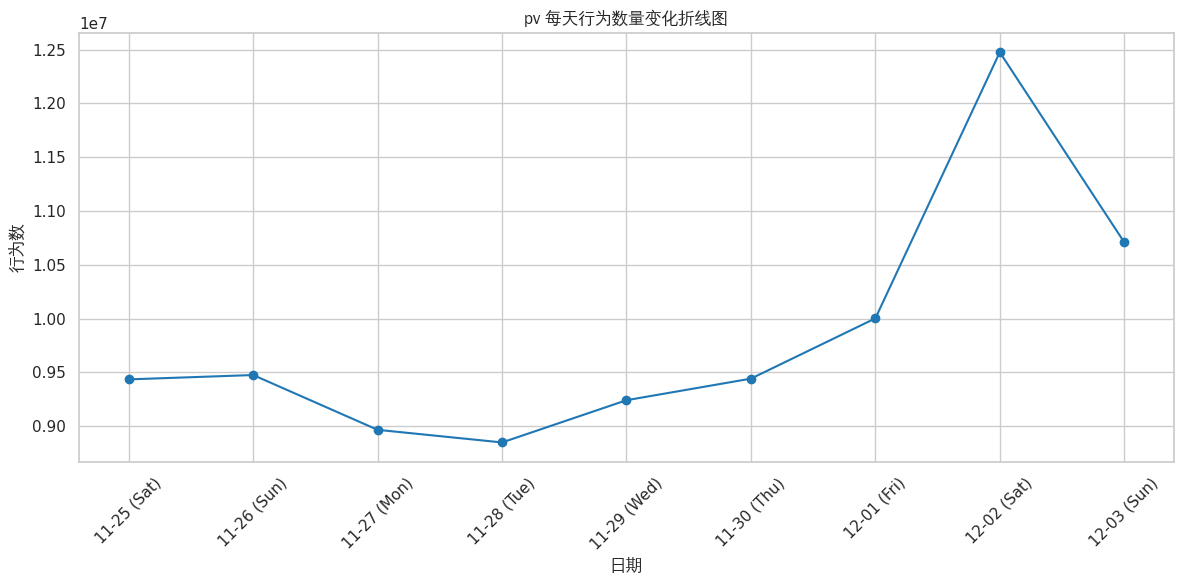

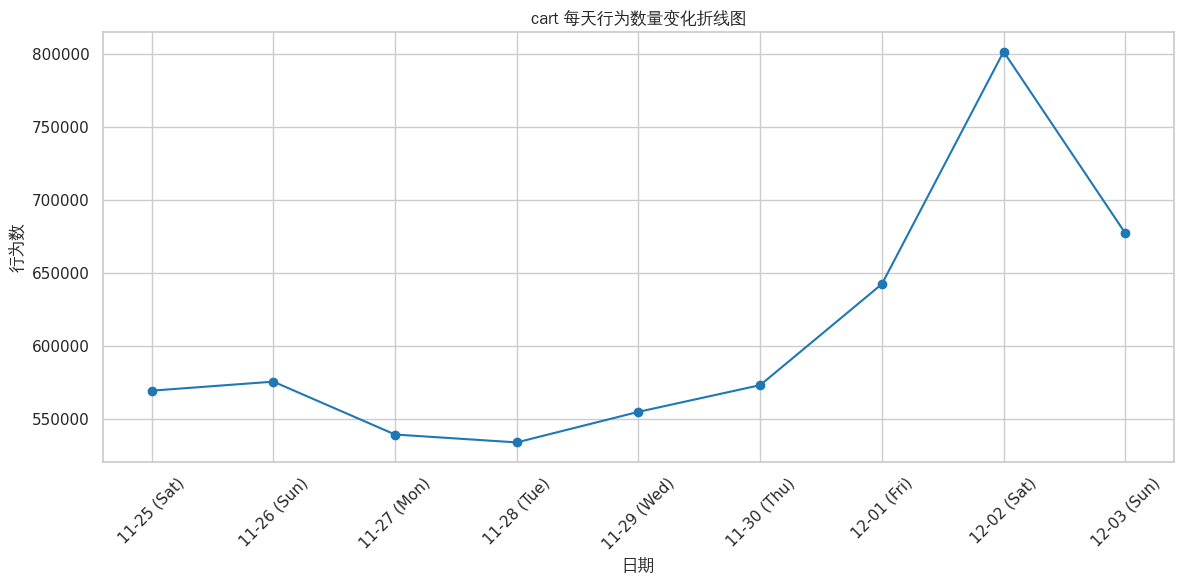

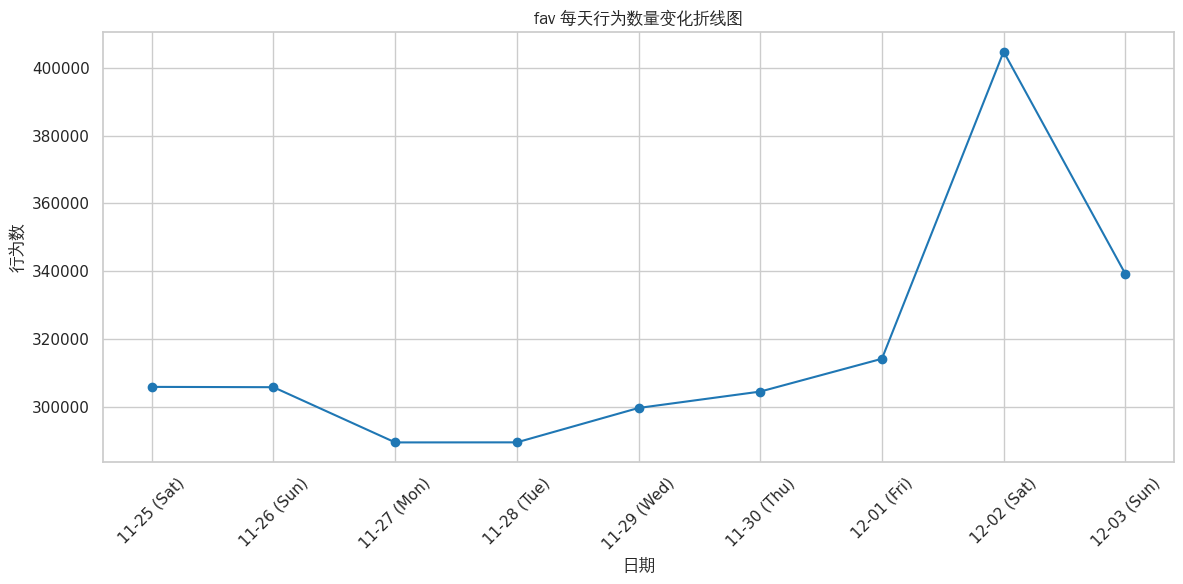

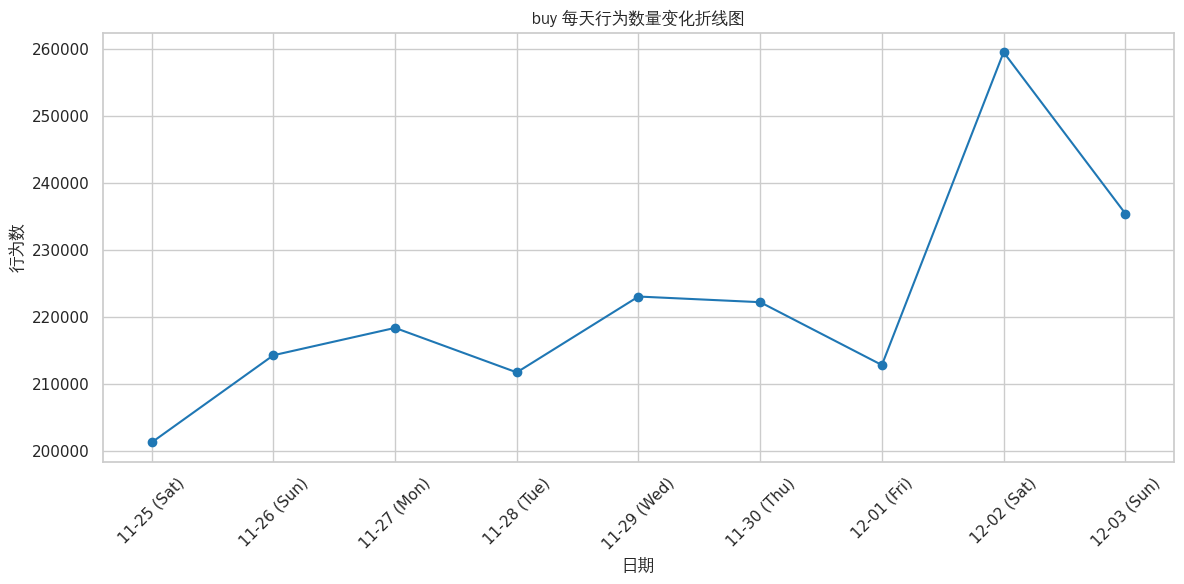

In [110]:
for behavior in daily_behavior_by_type.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(daily_behavior_by_type.index, daily_behavior_by_type[behavior], marker='o', color='tab:blue')
    plt.title(f"{behavior} 每天行为数量变化折线图", fontproperties=myfont)
    plt.xlabel("日期", fontproperties=myfont)
    plt.ylabel("行为数", fontproperties=myfont)
    plt.xticks(ticks=daily_behavior_by_type.index, labels=date_labels, rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'figures/{behavior}_每天行为数量变化折线图.png')
    plt.show()


In [118]:
# 计算购买转化率
daily_behavior_by_type['buy_ratio'] = daily_behavior_by_type['buy'] / daily_behavior_by_type['pv']

daily_behavior_by_type['buy_ratio']

date
2017-11-25    0.021335
2017-11-26    0.022617
2017-11-27    0.024358
2017-11-28    0.023930
2017-11-29    0.024139
2017-11-30    0.023537
2017-12-01    0.021281
2017-12-02    0.020806
2017-12-03    0.021988
Name: buy_ratio, dtype: float64

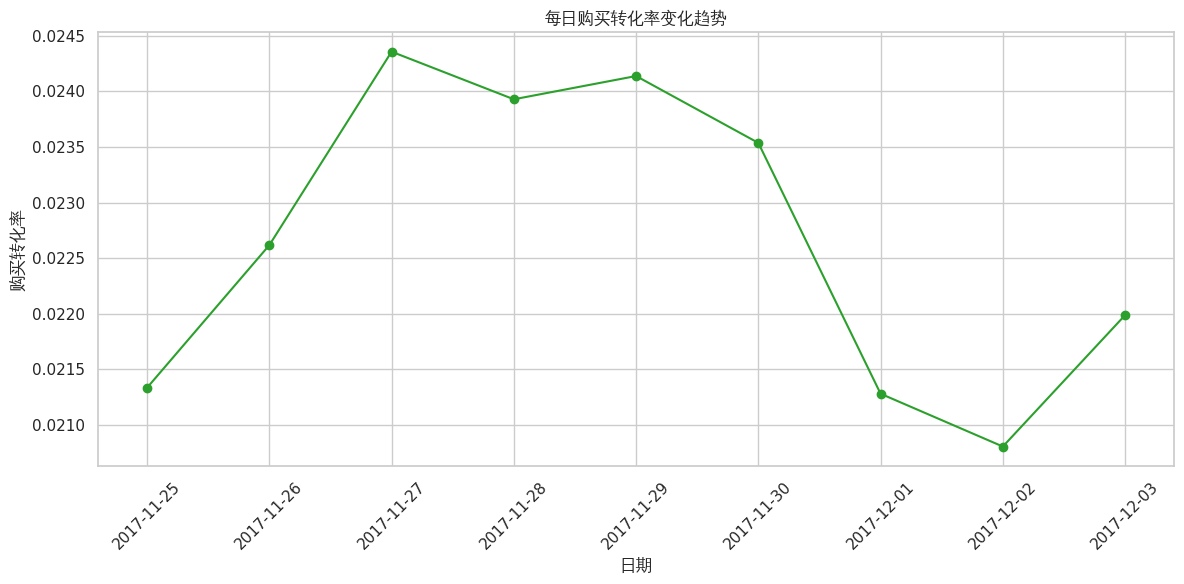

In [119]:
# 可视化
plt.figure(figsize=(12, 6))
plt.plot(daily_behavior_by_type.index, daily_behavior_by_type['buy_ratio'], marker='o', color='tab:green')
plt.title("每日购买转化率变化趋势", fontproperties=myfont)
plt.xlabel("日期", fontproperties=myfont)
plt.ylabel("购买转化率", fontproperties=myfont)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/每日购买转化率变化趋势.png')
plt.show()

### 数据分析与解读建议

1. 行为趋势观察

浏览量（pv）整体呈波动上升趋势

11月下旬至12月初，pv波动较大，12月2日达到了最高点1247万，可能与促销活动或节假日有关。

加购（cart）和收藏（fav）数量基本与浏览量趋势一致，同样在12月2日达到峰值，表明用户活跃度在这天显著提高。

购买数（buy）变化较为平稳，12月2日也为最高，且相对pv涨幅更大

说明该日期不仅流量大，转化率也较高。

2. 购买转化率观察

转化率波动不大，基本保持在2%—2.4%之间，11月27-29日转化率稍高。

12月2日虽流量大，但转化率略低，可能是流量增长来自新访客或促销活动带来的冲动浏览。

3. 行为结构分析

浏览量远大于其他行为，说明大部分用户停留只是浏览。

加购和收藏数量相近，收藏数稍低于加购。

购买数最低，符合漏斗模型的典型特点。

购买数与加购、收藏的比例可以反映用户的购买意向和漏斗转化效率。

4. 可能的业务启示

流量和购买不完全成正比，12月2日流量增长巨大但转化率稍低，需分析当天流量质量（是否新用户多，是否促销影响）。

可以重点分析购买转化率高的日期（如11月27-29日），找出促成转化的因素。

促销、活动、推荐策略可以针对低转化日期进行优化。

加强对加购和收藏用户的运营，提高转化率。

总结
数据整体稳定，流量和购买数日均较高。

购买转化率稳定在约2%。

12月2日流量高峰明显，业务重点观察该日用户行为。

结合加购和收藏行为数据，有助于制定用户促活策略。

### 6.行为按小时分布情况

In [37]:
# 提取小时字段（0~23）
df['hour'] = df['event_time'].dt.hour

# 按小时统计总行为数
hourly_behavior = df.groupby('hour').size()
print(hourly_behavior)

hour
0     3403016
1     4182498
2     4877458
3     4741809
4     4771058
5     5208034
6     5189882
7     5365029
8     5151948
9     4697671
10    4795878
11    6021741
12    7304809
13    8369714
14    8299812
15    6291228
16    3059279
17    1422954
18     769608
19     525318
20     448633
21     580034
22    1223281
23    2213841
dtype: int64


In [108]:
print(hourly_behavior.columns)

Index(['pv', 'cart', 'fav', 'buy', 'total', 'buy_ratio'], dtype='object', name='behavior_type')


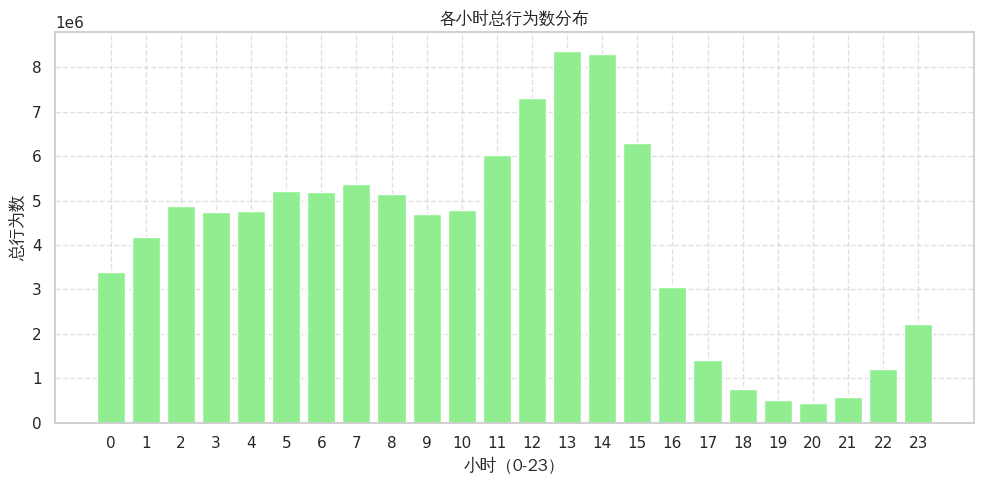

In [120]:
# 绘图
plt.figure(figsize=(10, 5))
plt.bar(hourly_behavior.index, hourly_behavior['total'], color='lightgreen')
plt.title("各小时总行为数分布", fontproperties=myfont)
plt.xlabel("小时（0-23）", fontproperties=myfont)
plt.ylabel("总行为数", fontproperties=myfont)
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# 保存图像
plt.savefig("figures/各小时总行为数分布.png")
plt.show()

### 7.各类行为小时分布

In [44]:
# 提取小时字段
df['hour'] = df['event_time'].values.astype('datetime64[h]').astype(int) % 24

# 按 hour 和 behavior_type 分组计数
hourly_behavior = df.groupby(['hour', 'behavior_type']).size().unstack(fill_value=0)
# 固定行为顺序
hourly_behavior_order = ['pv', 'cart', 'fav', 'buy']
for col in hourly_behavior_order:
    if col not in hourly_behavior.columns:
        hourly_behavior[col] = 0 
hourly_behavior = hourly_behavior[hourly_behavior_order] 

print(hourly_behavior)

behavior_type       pv    cart     fav     buy
hour                                          
0              3042342  192036  103721   64917
1              3728498  229890  127976   96134
2              4334810  266963  147752  127933
3              4213518  260831  145412  122048
4              4255794  255811  140862  118591
5              4653934  279829  150844  123427
6              4642056  277093  148561  122172
7              4806706  284269  151321  122733
8              4607745  279035  148722  116446
9              4203397  255342  137631  101301
10             4313516  253193  133262   95907
11             5430878  314774  161057  115032
12             6586331  393209  191406  133863
13             7538383  465924  219974  145433
14             7443073  486249  232222  138268
15             5599903  395920  195330  100075
16             2747150  164776   94930   52423
17             1278813   76954   46239   20948
18              692240   41541   25079   10748
19           

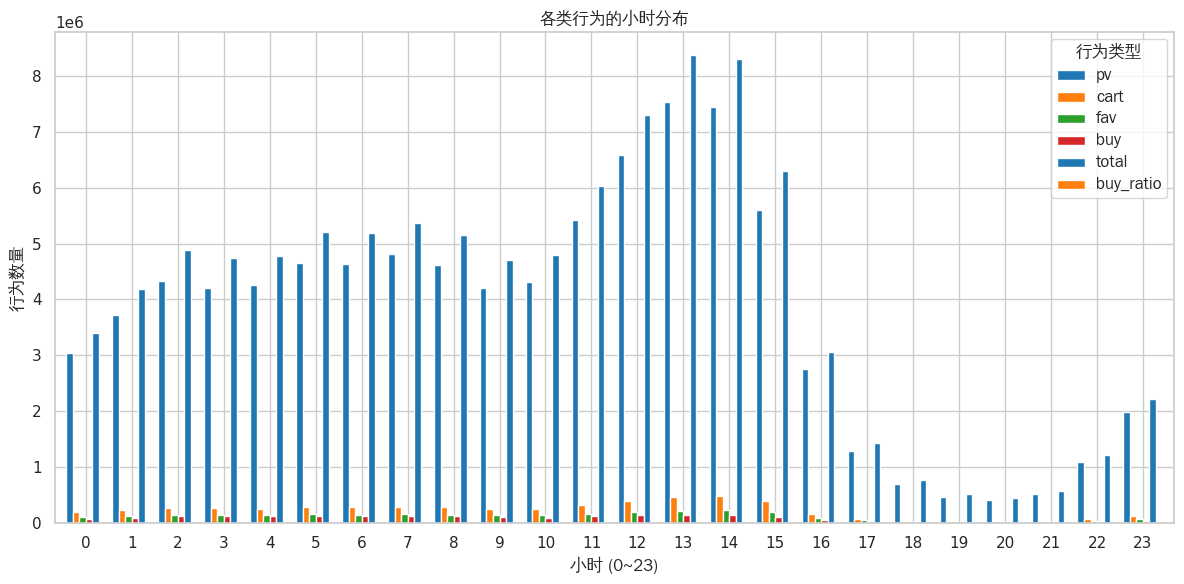

In [122]:
hourly_behavior.plot(kind='bar', stacked=False, figsize=(12, 6),
                     width=0.85, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.title("各类行为的小时分布", fontsize=14, fontproperties=myfont)
plt.xlabel("小时 (0~23)", fontsize=12, fontproperties=myfont)
plt.ylabel("行为数量", fontsize=12, fontproperties=myfont)
plt.xticks(rotation=0)

# 设置图例
legend = plt.legend(title='行为类型', fontsize=10)
legend.get_title().set_fontproperties(myfont)
legend.get_title().set_fontsize(12)
for text in legend.get_texts():
    text.set_fontproperties(myfont)

plt.tight_layout()
plt.savefig('figures/各类行为的小时分布.png')
plt.show()

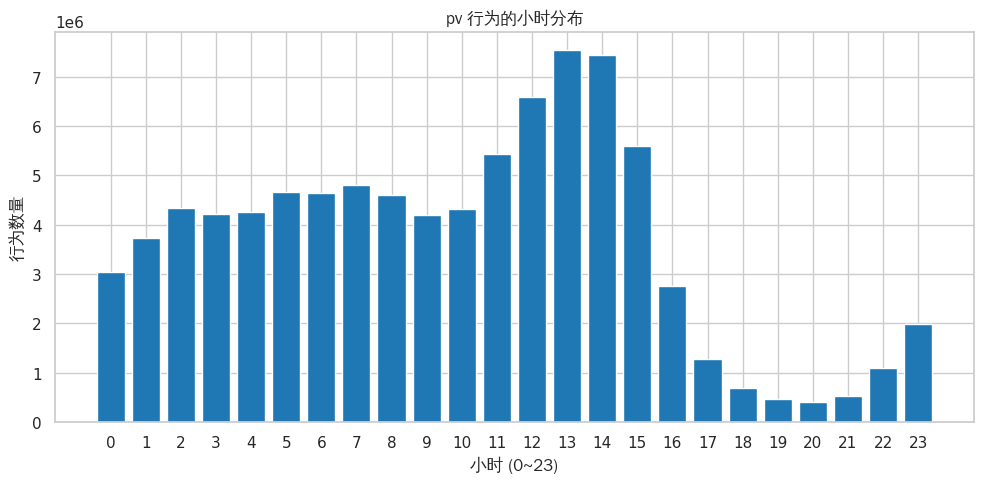

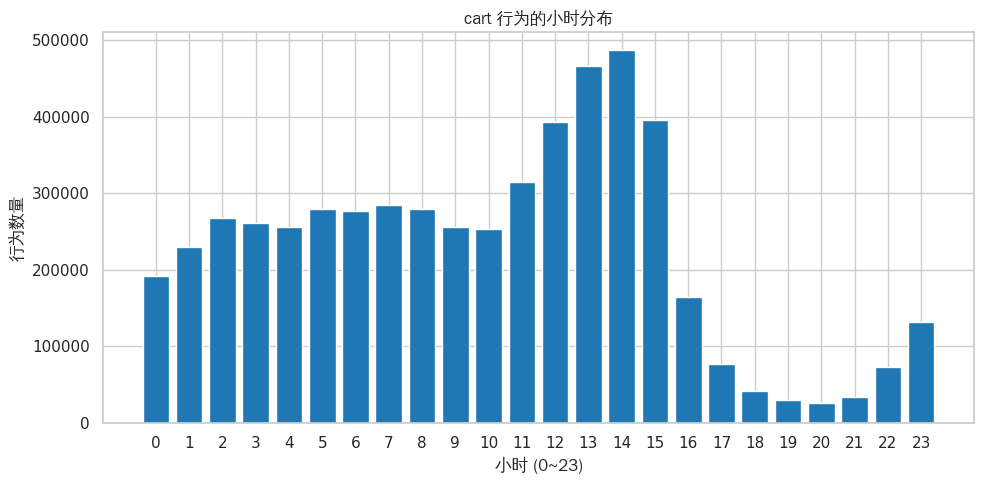

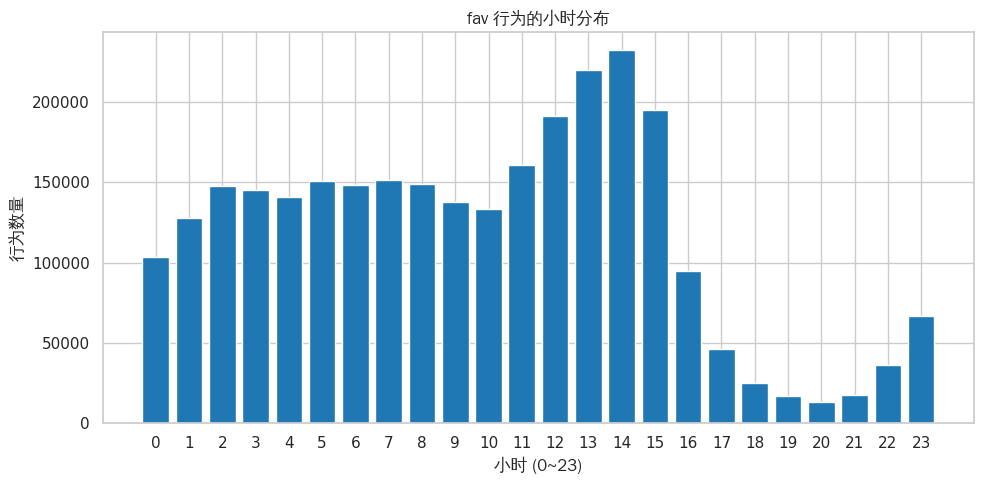

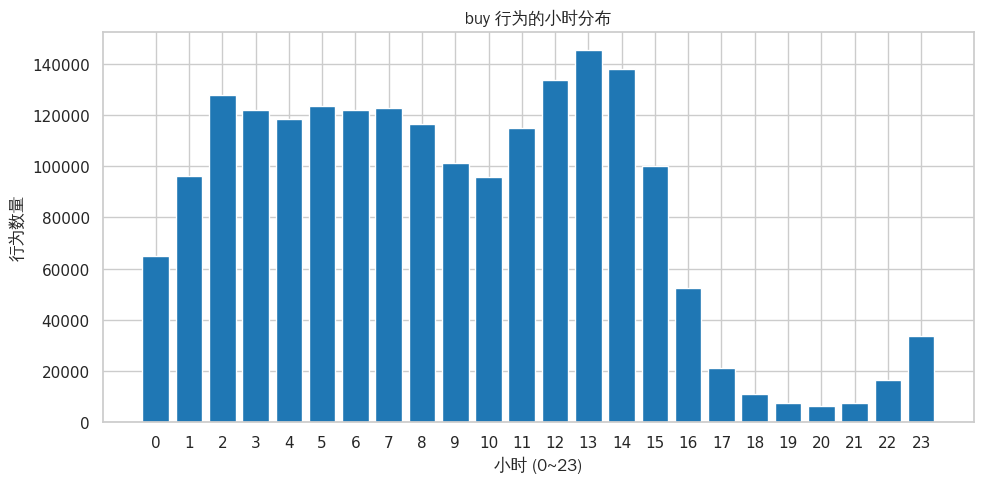

In [101]:
for behavior in hourly_behavior.columns:
    plt.figure(figsize=(10, 5))
    plt.bar(hourly_behavior.index, hourly_behavior[behavior], color='#1f77b4')
    plt.title(f"{behavior} 行为的小时分布", fontsize=14, fontproperties=myfont)
    plt.xlabel("小时 (0~23)", fontsize=12, fontproperties=myfont)
    plt.ylabel("行为数量", fontsize=12, fontproperties=myfont)
    plt.xticks(range(24))
    plt.tight_layout()

    # 保存为文件
    plt.savefig(f'figures/{behavior}_hourly_distribution.png')
    plt.show()

In [102]:
hourly_behavior['total'] = hourly_behavior[['pv', 'cart', 'fav', 'buy']].sum(axis=1)
hourly_behavior['buy_ratio'] = hourly_behavior['buy'] / hourly_behavior['total']


In [106]:
hourly_behavior['buy_ratio']

hour
0     0.019076
1     0.022985
2     0.026229
3     0.025739
4     0.024856
5     0.023699
6     0.023540
7     0.022876
8     0.022602
9     0.021564
10    0.019998
11    0.019103
12    0.018325
13    0.017376
14    0.016659
15    0.015907
16    0.017136
17    0.014721
18    0.013966
19    0.013731
20    0.013472
21    0.012673
22    0.013285
23    0.015231
Name: buy_ratio, dtype: float64

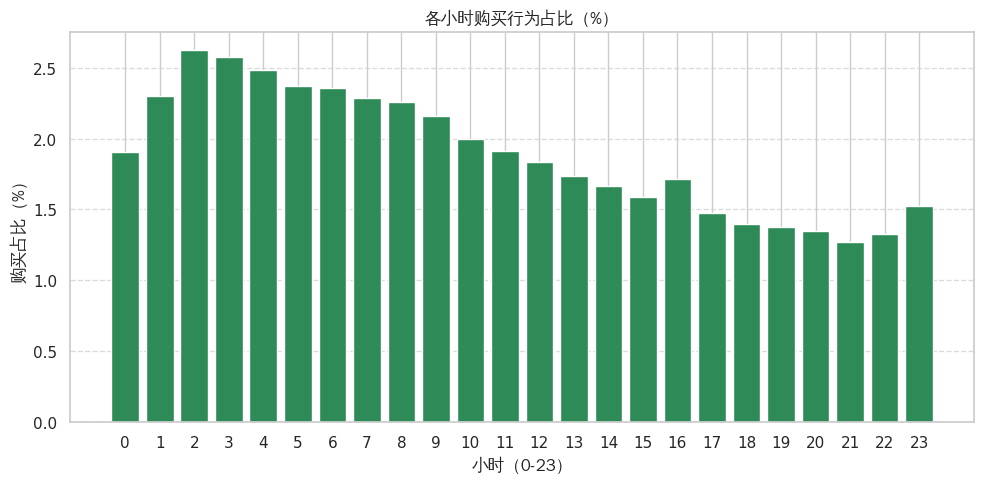

In [123]:


plt.figure(figsize=(10, 5))
plt.bar(hourly_behavior.index, hourly_behavior['buy_ratio'] * 100, color='seagreen')
plt.title('各小时购买行为占比（%）', fontsize=14,fontproperties=myfont)
plt.xlabel('小时（0-23）', fontsize=12,fontproperties=myfont)
plt.ylabel('购买占比（%）', fontsize=12,fontproperties=myfont)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(24))
plt.tight_layout()
plt.savefig('figures/各小时购买行为占比.png')
plt.show()


### 相关分析
凌晨 2~4 点为用户购买意图的最高时段，占比超过 2.5%，说明这段时间虽然总活跃人数少，但下单意愿强，可能是“夜猫子”群体的集中购买时段。

早上 6 点到中午 12 点购买占比较高但逐渐下降，尤其是 6~10 点用户活跃但转化率不算最高，说明这段时间更多是浏览和收藏。

下午 13 点之后到晚高峰 21 点整体购买占比持续走低，尤其在 14~20 点达到最低谷，反映出用户更多进行其他行为（如浏览、加购、收藏），但下单意愿不强。

晚上 22 点后购买占比出现回升，可能是用户临睡前集中下单的表现。

策略建议：凌晨时段促销有效：适合投放“夜猫子专属优惠”，刺激深夜用户下单。

午间推广效率高：中午 12 点前后是用户活跃且转化不错的窗口，适合推送限时折扣。

下午至傍晚优化引导转化：虽然用户活跃但转化低，建议加强商品推荐、优惠提示，提高下单动力。

晚间23点前提醒支付或结算：购物车引导或结算提醒可提升该时段成交转化率。

### 8.日活跃用户数

In [51]:

df['date'] = df['event_time'].dt.date

# 计算 DAU：每天的唯一用户数
dau = df.groupby('date')['user_id'].nunique().reset_index(name='DAU')
print(dau)


         date     DAU
0  2017-11-25  705571
1  2017-11-26  713522
2  2017-11-27  709207
3  2017-11-28  708339
4  2017-11-29  719356
5  2017-11-30  730809
6  2017-12-01  753166
7  2017-12-02  941709
8  2017-12-03  917531


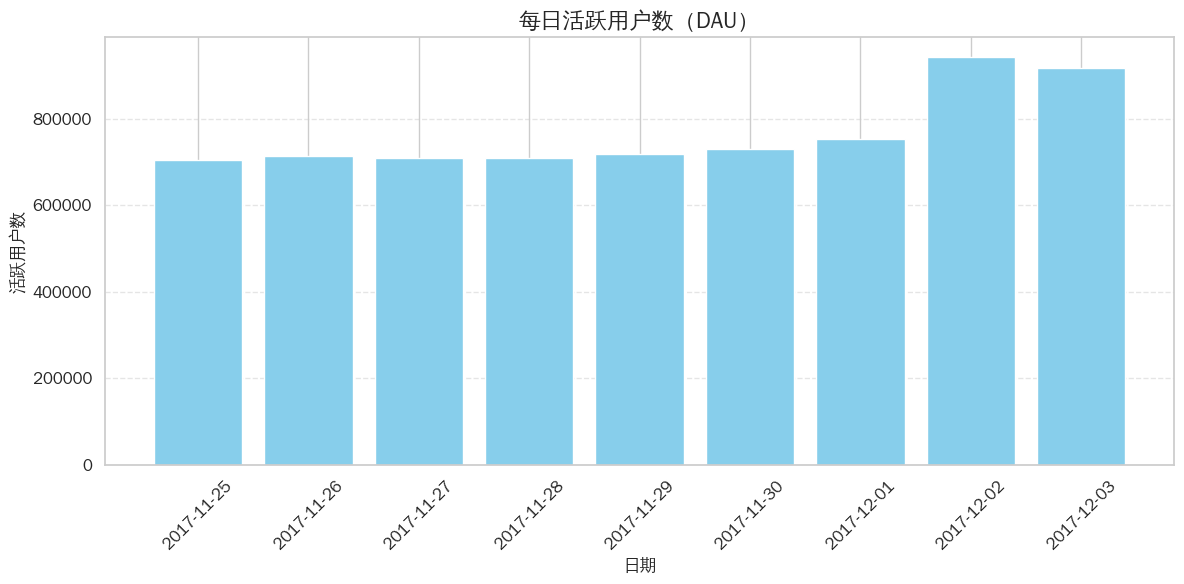

In [126]:
plt.figure(figsize=(12, 6))
plt.bar(dau['date'].astype(str), dau['DAU'], color='skyblue')

plt.title('每日活跃用户数（DAU）', fontproperties=myfont, fontsize=16)
plt.xlabel('日期', fontproperties=myfont, fontsize=12)
plt.ylabel('活跃用户数', fontproperties=myfont, fontsize=12)
plt.xticks(rotation=45, fontproperties=myfont)
plt.yticks(fontproperties=myfont)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('figures/每日活跃用户数.png')
plt.show()

### 9. 活跃用户留存率

In [60]:
# 确保日期字段是datetime格式，归一化到天
df['date'] = pd.to_datetime(df['event_time']).dt.normalize()

# 生成完整连续日期索引
date_range = pd.date_range(df['date'].min(), df['date'].max())

# 按天统计活跃用户集合
daily_users = df.groupby('date')['user_id'].apply(lambda x: set(x.unique()))
daily_users = daily_users.reindex(date_range, fill_value=set())


In [61]:
# 确保日期字段是datetime格式，归一化到天
df['date'] = pd.to_datetime(df['event_time']).dt.normalize()

# 生成完整连续日期索引
date_range = pd.date_range(df['date'].min(), df['date'].max())

# 按天统计活跃用户集合
daily_users = df.groupby('date')['user_id'].apply(lambda x: set(x.unique()))
daily_users = daily_users.reindex(date_range, fill_value=set())

retention = []
for i, day0 in enumerate(date_range):
    users_day0 = daily_users[day0]
    if not users_day0:
        continue

    record = {'date': day0}

    # 次日留存 (+1天)
    if i + 1 < len(date_range):
        users_day1 = daily_users[date_range[i + 1]]
        record['1日留存率'] = round(len(users_day0 & users_day1) / len(users_day0), 4)
    else:
        record['1日留存率'] = None

    # 三日留存 (+3天)
    if i + 3 < len(date_range):
        users_day3 = daily_users[date_range[i + 3]]
        record['3日留存率'] = round(len(users_day0 & users_day3) / len(users_day0), 4)
    else:
        record['3日留存率'] = None

    # 六日留存 (+6天)
    if i + 6 < len(date_range):
        users_day6 = daily_users[date_range[i + 6]]
        record['6日留存率'] = round(len(users_day0 & users_day6) / len(users_day0), 4)
    else:
        record['6日留存率'] = None

    retention.append(record)

retention_df = pd.DataFrame(retention)
print(retention_df)

        date   1日留存率   3日留存率   6日留存率
0 2017-11-25  0.7863  0.7578  0.7856
1 2017-11-26  0.7767  0.7649  0.9588
2 2017-11-27  0.7838  0.7808  0.9363
3 2017-11-28  0.7913  0.7960     NaN
4 2017-11-29  0.7955  0.9583     NaN
5 2017-11-30  0.8067  0.9362     NaN
6 2017-12-01  0.9445     NaN     NaN
7 2017-12-02  0.9275     NaN     NaN
8 2017-12-03     NaN     NaN     NaN


In [63]:
# 为 retention_df 添加 weekday 信息
retention_df['weekday'] = pd.to_datetime(retention_df['date']).dt.dayofweek.map({
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
})

# 构建新标签：例如 "2017-11-25 (Sat)"
retention_df['date_label'] = retention_df['date'].astype(str) + ' (' + retention_df['weekday'] + ')'

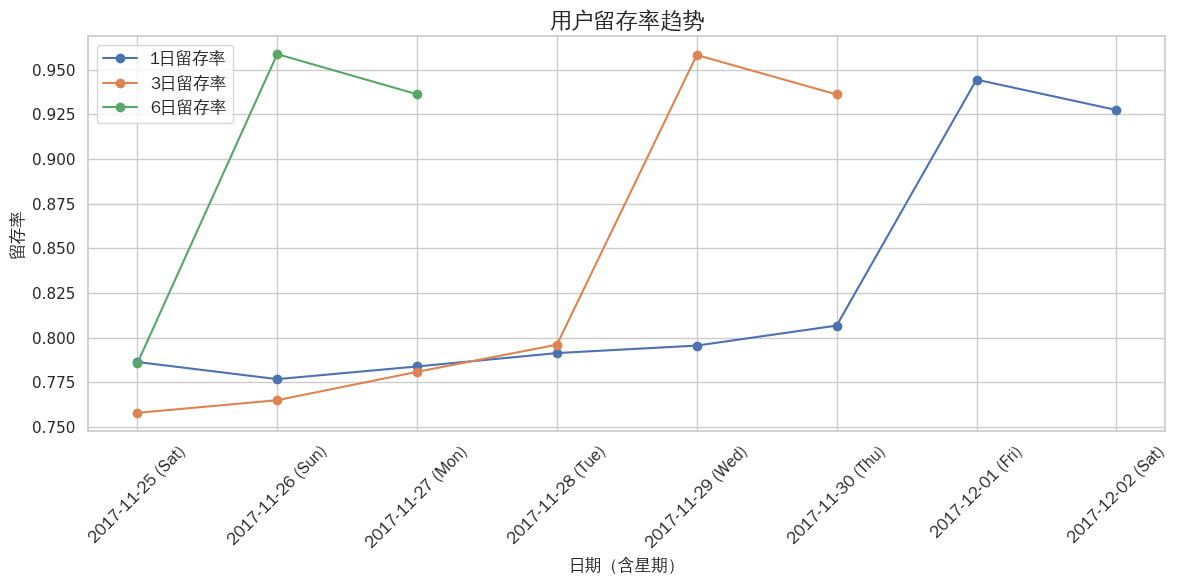

In [128]:
# 绘图
plt.figure(figsize=(12, 6))
for col in ['1日留存率', '3日留存率', '6日留存率']:
    plt.plot(retention_df['date_label'], retention_df[col], marker='o', label=col)

plt.title('用户留存率趋势', fontproperties=myfont, fontsize=16)
plt.xlabel('日期（含星期）', fontproperties=myfont, fontsize=12)
plt.ylabel('留存率', fontproperties=myfont, fontsize=12)
plt.legend(prop=myfont)
plt.grid(True)
plt.xticks(rotation=45, fontproperties=myfont)
plt.tight_layout()
plt.savefig('figures/用户留存率趋势.png')
plt.show()

### 数据分析

1日留存率

大多数日期的1日留存率稳定在约0.78到0.81之间，整体表现较为稳定且较高。

12月1日及12月2日的1日留存率分别达到了0.94和0.93，显著高于其他日期，可能受到了某些促销活动或产品优化的积极影响。

3日留存率

3日留存率波动较大，部分日期接近或超过0.95，显示部分用户群体具有较强的活跃度和粘性。

从整体趋势看，3日留存率较1日留存率稍有下降，符合常规用户流失趋势。


6日留存率

6日留存率数据缺失较多，已有数据波动范围较大（0.78~0.95），显示部分日期用户粘性较好。

从整体趋势看，留存率呈现“先高后低”的常规模式：初期留存较高，随着时间推移逐步下降。

12月1日和12月2日的1日留存率异常提升，提示需要深入挖掘该时间段内可能的市场活动或产品变化，作为提升用户活跃的参考。


### 10.用户行为频次分布

In [70]:
# 统计每个用户的各类行为次数

behavior_order = ['pv', 'cart', 'fav', 'buy']


# 分组聚合
user_behavior_counts = (
    df.groupby(['user_id', 'behavior_type'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=behavior_order, fill_value=0)
)




In [71]:
user_behavior_counts.head(100)

behavior_type,pv,cart,fav,buy
user_id,,,,
1,53,0,0,0
2,54,3,7,7
3,33,15,5,0
4,268,13,0,4
5,64,0,0,0
...,...,...,...,...
104,31,7,1,0
105,30,6,0,3
106,111,22,0,2


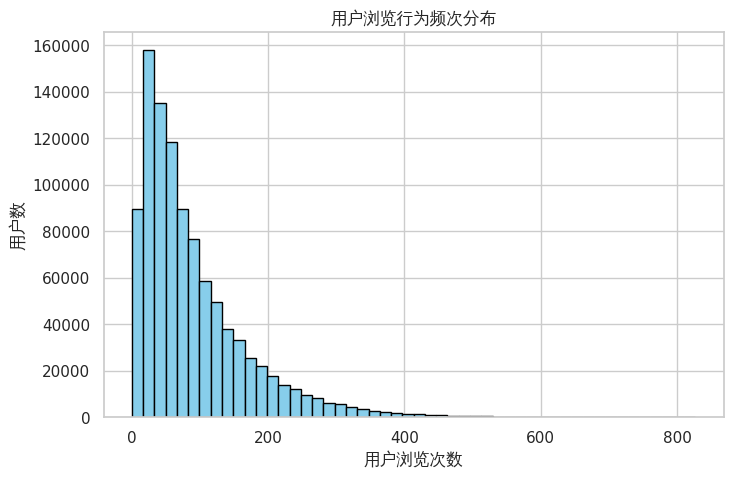

In [143]:
plt.figure(figsize=(8,5))
plt.hist(user_behavior_counts['pv'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('用户浏览次数', fontproperties=myfont)
plt.ylabel('用户数', fontproperties=myfont)
plt.title('用户浏览行为频次分布', fontproperties=myfont)
plt.grid(True)
plt.savefig('figures/用户浏览行为频次分布.png')
plt.show()

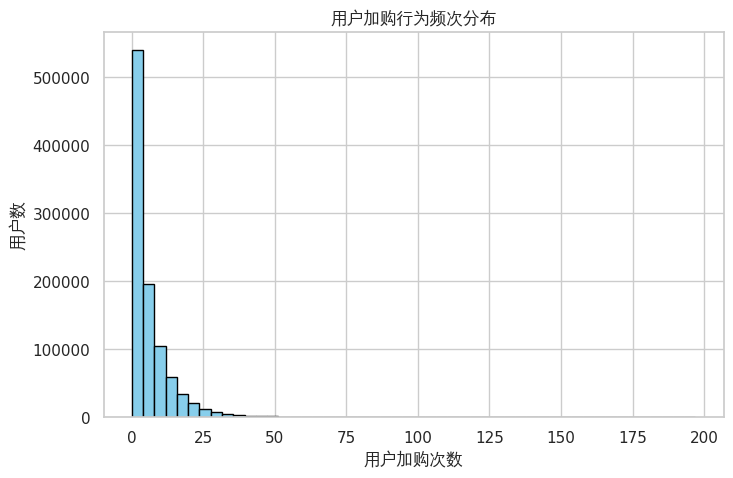

In [142]:
plt.figure(figsize=(8,5))
plt.hist(user_behavior_counts['cart'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('用户加购次数', fontproperties=myfont)
plt.ylabel('用户数', fontproperties=myfont)
plt.title('用户加购行为频次分布', fontproperties=myfont)
plt.grid(True)
plt.savefig('用户加购行为频次分.png')
plt.show()

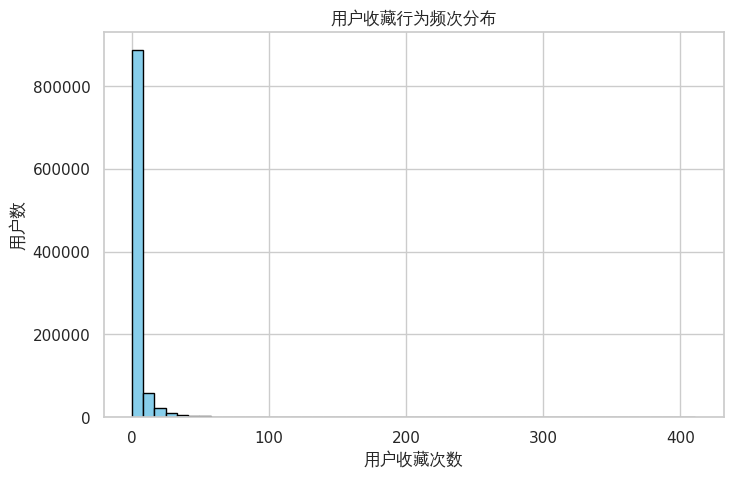

In [141]:
plt.figure(figsize=(8,5))
plt.hist(user_behavior_counts['fav'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('用户收藏次数', fontproperties=myfont)
plt.ylabel('用户数', fontproperties=myfont)
plt.title('用户收藏行为频次分布', fontproperties=myfont)
plt.grid(True)
plt.savefig('figures/用户收藏行为频次分布.png')
plt.show()

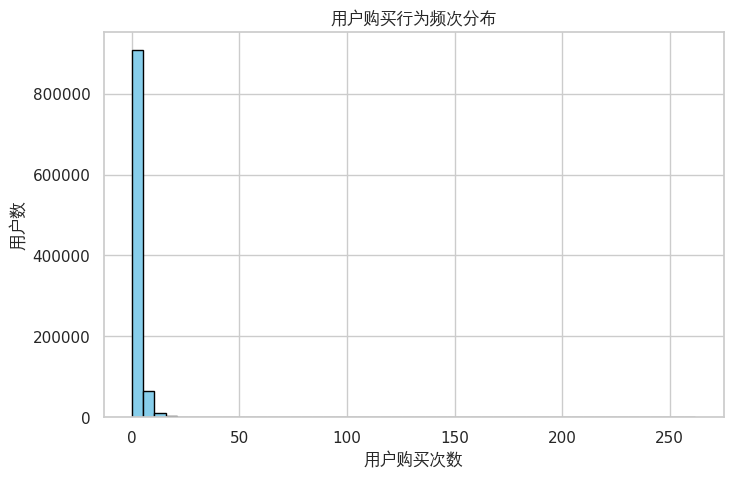

In [140]:
plt.figure(figsize=(8,5))
plt.hist(user_behavior_counts['buy'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('用户购买次数', fontproperties=myfont)
plt.ylabel('用户数', fontproperties=myfont)
plt.title('用户购买行为频次分布', fontproperties=myfont)
plt.grid(True)
plt.savefig('figures/用户购买行为频次分布.png')
plt.show()

In [79]:
### 不同行为堆积柱状图（Top用户）
top_users = user_behavior_counts.sum(axis=1).sort_values(ascending=False).head(20).index
top_user_df = user_behavior_counts.loc[top_users]
print(top_user_df)

behavior_type   pv  cart  fav  buy
user_id                           
939171         827     0    2    0
741404         817     0    2    1
503757         793     8   10    6
696044         810     3    0    2
642790         810     0    0    1
558130         773     4   32    2
380321         806     0    0    0
820050         800     0    4    2
54206          777    15    1    0
419460         780    12    0    0
208813         743    45    0    2
763684         771    17    0    0
706840         784     3    0    0
996214         772    14    0    1
212067         764    17    0    0
49094          772     4    0    0
886611         773     0    0    1
985655         745     8   17    4
42400          734    31    1    0
171507         765     0    0    0


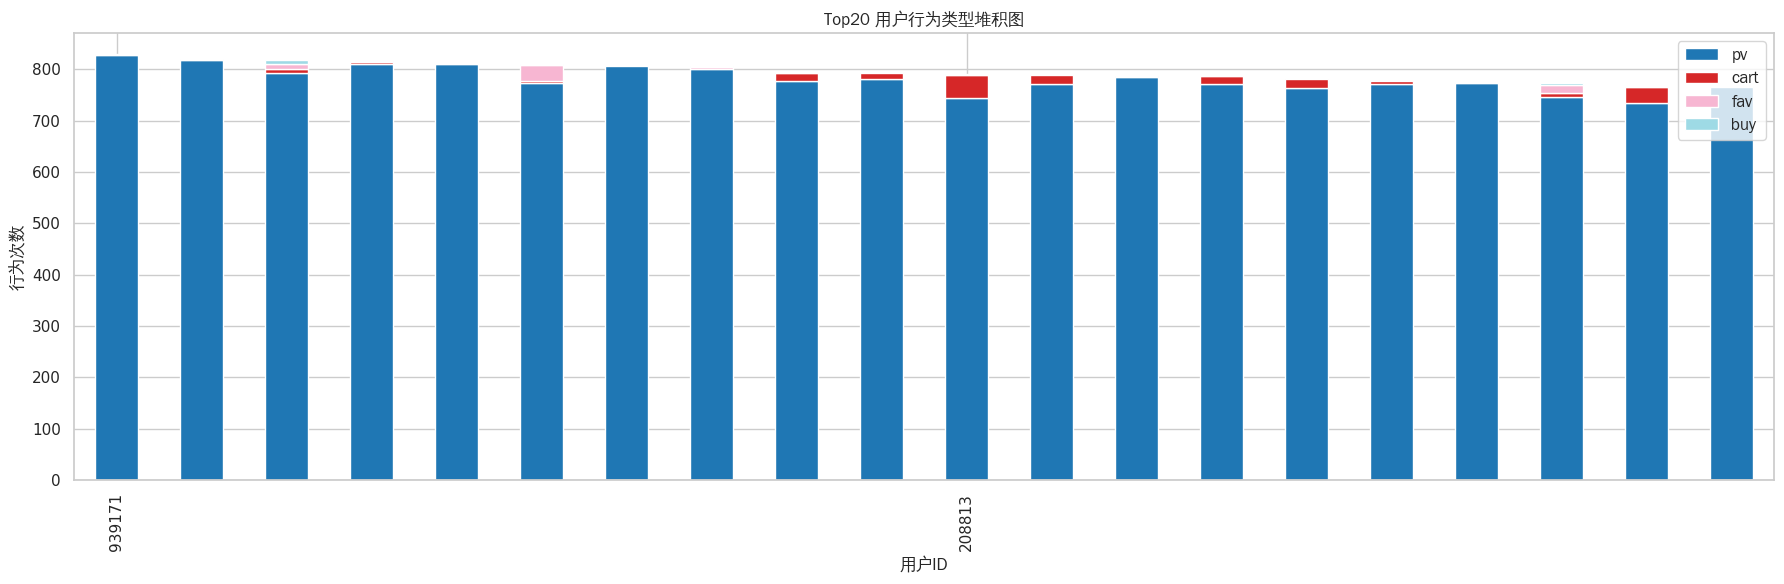

In [139]:
top_user_df.plot(
    kind='bar',
    stacked=True,
    figsize=(18,6),
    colormap='tab20'
)

plt.xlabel('用户ID', fontproperties=myfont)
plt.ylabel('行为次数', fontproperties=myfont)
plt.title('Top20 用户行为类型堆积图', fontproperties=myfont)
plt.xticks(ticks=range(0,20,10), labels=top_user_df.index[::10], rotation=90)
plt.legend(prop=myfont)
plt.tight_layout()
plt.savefig('figures/Top20用户行为类型堆积图.png')
plt.show()

### 11.用户生命周期划分

In [83]:
# 确保 df['date'] 是日期类型
df['date'] = df['event_time'].dt.date

# 统计每个用户活跃了多少天
user_active_days = df.groupby('user_id')['date'].nunique().reset_index(name='活跃天数')

# 定义生命周期分组函数
def classify_lifecycle(days):
    if days == 1:
        return '新用户'
    elif days <= 3:
        return '短期活跃'
    elif days <= 5:
        return '中期活跃'
    else:
        return '长期活跃'

user_active_days['生命周期'] = user_active_days['活跃天数'].apply(classify_lifecycle)


In [84]:
print(user_active_days)

        user_id  活跃天数  生命周期
0             1     9  长期活跃
1             2     8  长期活跃
2             3     9  长期活跃
3             4     7  长期活跃
4             5     5  中期活跃
...         ...   ...   ...
987979  1018007     7  长期活跃
987980  1018008     5  中期活跃
987981  1018009     8  长期活跃
987982  1018010     7  长期活跃
987983  1018011     7  长期活跃

[987984 rows x 3 columns]


In [88]:
lifecycle_counts = user_active_days['生命周期'].value_counts().reindex(['新用户','短期活跃','中期活跃','长期活跃'])
print(lifecycle_counts)

新用户        159
短期活跃     18794
中期活跃    200612
长期活跃    768419
Name: 生命周期, dtype: int64


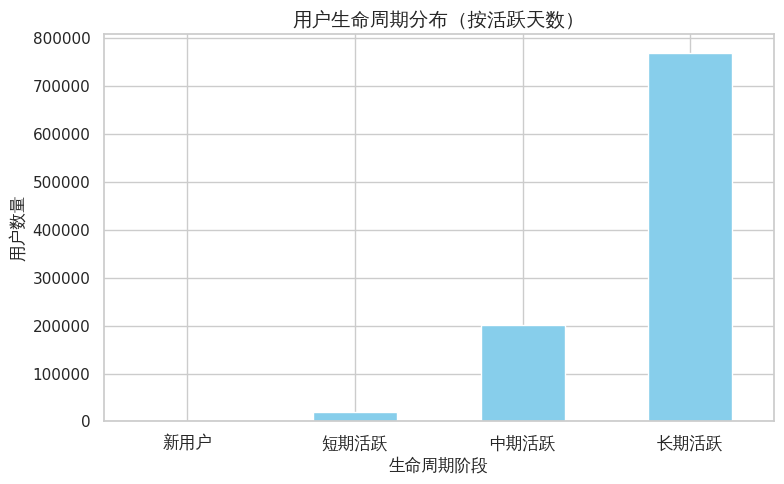

In [138]:
plt.figure(figsize=(8,5))
lifecycle_counts.plot(kind='bar', color='skyblue')
plt.title('用户生命周期分布（按活跃天数）', fontproperties=myfont, fontsize=14)
plt.xlabel('生命周期阶段', fontproperties=myfont)
plt.ylabel('用户数量', fontproperties=myfont)
plt.xticks(rotation=0, fontproperties=myfont)
plt.tight_layout()
plt.savefig('figures/用户生命周期分布（按活跃天数）.png')
plt.show()

In [90]:
# 各阶段用户占比（百分比）
lifecycle_ratio = user_active_days['生命周期'].value_counts(normalize=True).reindex(['新用户', '短期活跃', '中期活跃', '长期活跃'])


In [92]:
print(lifecycle_ratio)

新用户     0.000161
短期活跃    0.019023
中期活跃    0.203052
长期活跃    0.777765
Name: 生命周期, dtype: float64


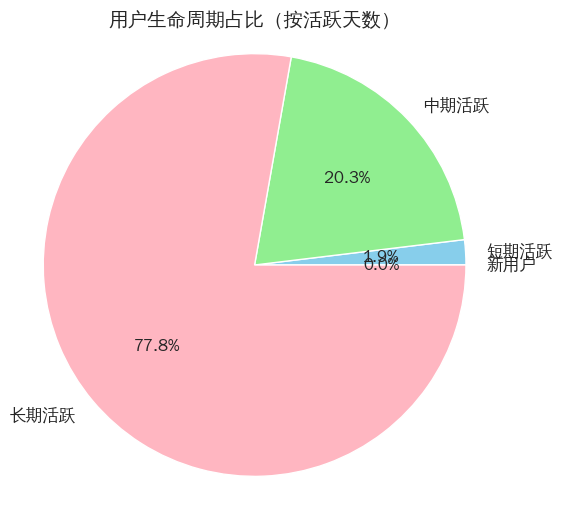

In [137]:
plt.figure(figsize=(6,6))
plt.pie(
    lifecycle_ratio,
    labels=lifecycle_ratio.index,
    autopct='%.1f%%',
    colors=['#FFD700','#87CEEB','#90EE90','#FFB6C1'],
    textprops={'fontproperties': myfont, 'fontsize': 12}
)
plt.title('用户生命周期占比（按活跃天数）', fontproperties=myfont, fontsize=14)
plt.axis('equal')  # 保持圆形
plt.savefig('figures/用户生命周期占比（按活跃天数）')
plt.show()


长期活跃用户占绝大多数，约占总用户的绝大部分，说明大部分用户具有较高的使用粘性和忠诚度。

中期活跃用户也占比较大，用户在4-5天仍保持活跃，说明用户留存较好。

短期活跃和新用户数量较少，暗示初始留存及转化还有提升空间。尤其是新用户数量较少，建议关注新用户的体验和转化路径。